In [ ]:
from pymatgen.analysis.diffusion.aimd.rdf import RadialDistributionFunction, RadialDistributionFunctionFast
from monty.serialization import loadfn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
obj = loadfn('../pymatgen/analysis/diffusion/aimd/tests/cNa3PS4_pda.json')

/Users/shyue/repos/pymatgen/pymatgen/analysis/diffusion_analyzer.py:45: UserWarning: All code in pymatgen.analysis.diffusion_analyzer has been moved to the separate add-on packagepymatgen-diffusion, which also includes a lot more functionality for analyzing diffusioncalculations. This module here is retained for backwards compatibility. It will be removed from2022.1.1.
  warnings.warn(


In [ ]:
structure_list = []
for i, s in enumerate(obj.get_drift_corrected_structures()):
    structure_list.append(s)
    if i == 9: break

In [ ]:
rdf_func = RadialDistributionFunction.from_species(
           structures=structure_list, ngrid=101, rmax=10.0, cell_range=1,
           sigma=0.2, species=['Na'], reference_species=['S'])

# fewer parameters in new implementations
rdf_func_faster = RadialDistributionFunctionFast(structures=structure_list, 
                                                ngrid=101, rmax=10.0, sigma=0.2)

Text(0.5, 1.0, 'Old RDF implementation')

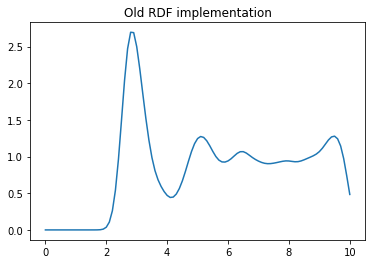

In [ ]:
plt.plot(rdf_func.interval, rdf_func.rdf)
plt.title("Old RDF implementation")

Text(0.5, 1.0, 'Old coordination number')

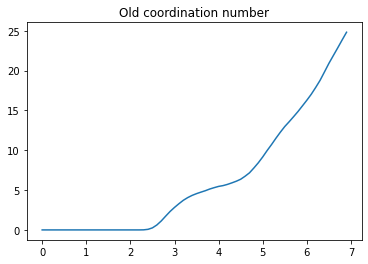

In [ ]:
plt.plot(rdf_func.interval[:70], rdf_func.coordination_number[:70])
plt.title("Old coordination number")

Text(0.5, 1.0, 'New RDF implementation')

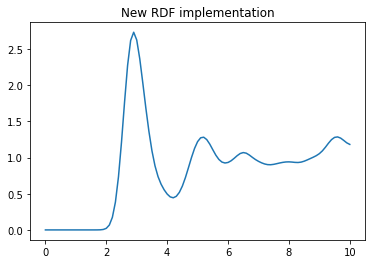

In [ ]:
r, rdf2 = rdf_func_faster.get_rdf('S', 'Na')
plt.plot(r, rdf2)
plt.title("New RDF implementation")

Text(0.5, 1.0, 'New coordination number')

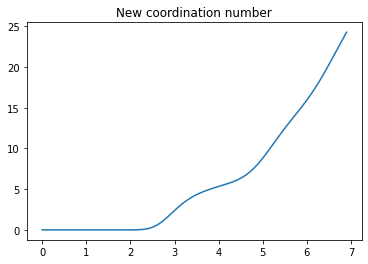

In [ ]:
r, cn = rdf_func_faster.get_coordination_number('S', 'Na')
plt.plot(r[:70], cn[:70])
plt.title('New coordination number')

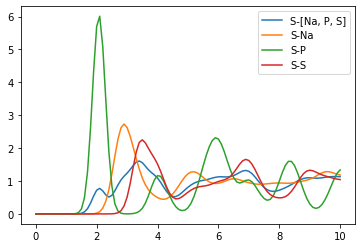

In [ ]:

r, rdf_na_p_s = rdf_func_faster.get_rdf('S', ['Na', 'P', 'S'])
r, rdf_na = rdf_func_faster.get_rdf('S', ['Na'])
r, rdf_p = rdf_func_faster.get_rdf('S', ['P'])
r, rdf_s = rdf_func_faster.get_rdf('S', ['S'])

plt.plot(r, rdf_na_p_s, label='S-[Na, P, S]')
plt.plot(r, rdf_na, label='S-Na')
plt.plot(r, rdf_p, label='S-P')
plt.plot(r, rdf_s, label='S-S')
plt.legend()



(-0.2, 6.2)

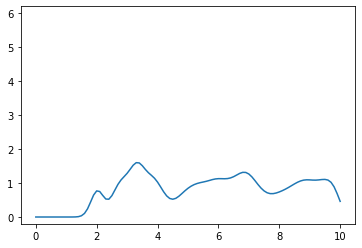

In [ ]:
rdf_func = RadialDistributionFunction.from_species(
           structures=structure_list, ngrid=101, rmax=10.0, cell_range=1,
           sigma=0.2, species=['Na','P', 'S'], reference_species=['S'])

plt.plot(rdf_func.interval, rdf_func.rdf)
plt.ylim([-0.2, 6.2])

In [ ]:
%%timeit -n 1

rdf_func = RadialDistributionFunction.from_species(
           structures=structure_list, ngrid=101, rmax=10.0, cell_range=1,
           sigma=0.2, species=['Na'], reference_species=['S'])

440 ms ± 4.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit -n 1
# fewer parameters in new implementations
rdf_func_faster = RadialDistributionFunctionFast(structures=structure_list, 
                                                ngrid=101, rmax=10.0, sigma=0.2)

47.3 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
